
📊 Model Comparison:
                  Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression     0.975        1.0  0.947368  0.972973
1                  KNN     0.975        1.0  0.947368  0.972973
2              XGBoost     1.000        1.0  1.000000  1.000000


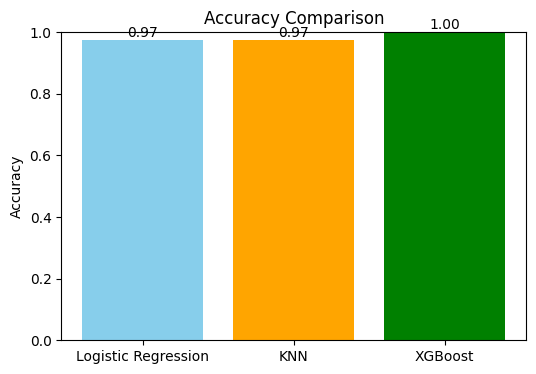

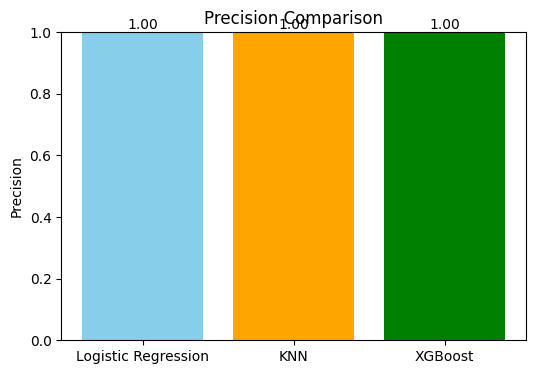

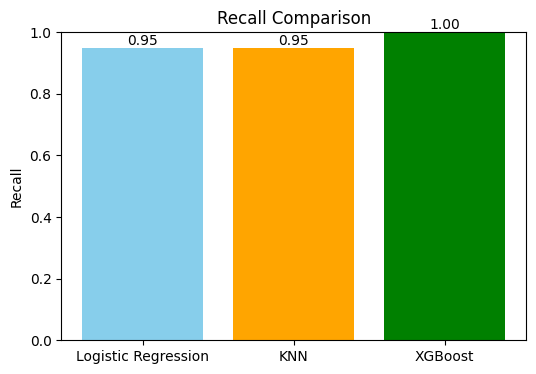

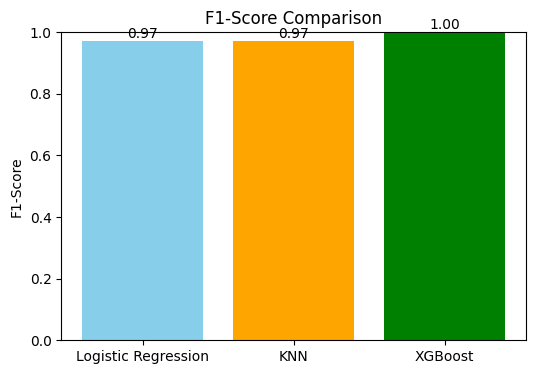

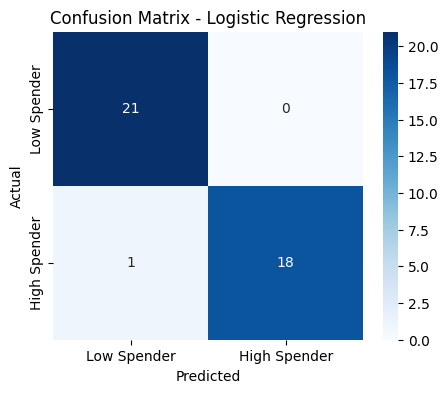

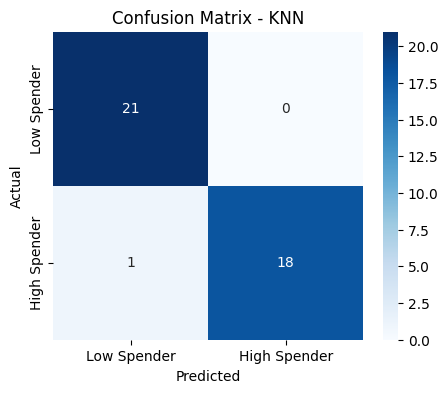

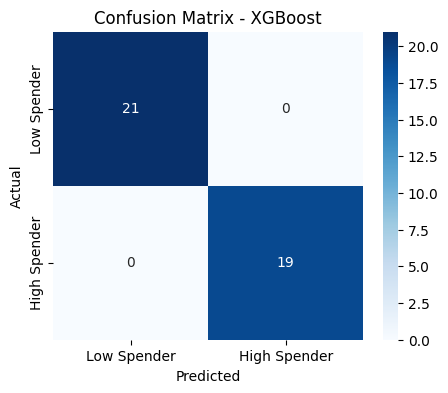

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Step 3: Data Preprocessing
# Encode categorical column "Gender"
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])  # Male=1, Female=0

# Create binary target: HighSpender (1) if Spending Score > 50 else 0
df["HighSpender"] = (df["Spending Score (1-100)"] > 50).astype(int)

# Define features (drop ID + target)
X = df.drop(["CustomerID", "HighSpender"], axis=1)
y = df["HighSpender"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Train Models
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# XGBoost
xgb_model = xgb.XGBClassifier(eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Step 5: Evaluation & Metrics Collection
models = {
    "Logistic Regression": y_pred_lr,
    "KNN": y_pred_knn,
    "XGBoost": y_pred_xgb
}

results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

for name, y_pred in models.items():
    results["Model"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred))
    results["Recall"].append(recall_score(y_test, y_pred))
    results["F1-Score"].append(f1_score(y_test, y_pred))

results_df = pd.DataFrame(results)
print("\n📊 Model Comparison:\n", results_df)

# Step 6: Plot Metric Comparison
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

for metric in metrics:
    plt.figure(figsize=(6,4))
    plt.bar(results_df["Model"], results_df[metric], color=["skyblue", "orange", "green"])
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.ylim(0,1)
    for i, v in enumerate(results_df[metric]):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
    plt.show()

# Step 7: Confusion Matrix Heatmaps
for name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Low Spender", "High Spender"],
                yticklabels=["Low Spender", "High Spender"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
